In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel("P3- Churn-Modelling Data.xlsx")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 1.customer demographics

In [4]:
data['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83], dtype=int64)

In [5]:
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90,100,np.inf]
labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100 and above']


In [6]:
data['Age']=pd.to_numeric(data['Age'],errors='coerce')

In [7]:
data['Age']=pd.cut(data['Age'],bins=bins,labels=labels)

In [8]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,40-49,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,40-49,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,40-49,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,30-39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,40-49,2,125510.82,1,1,1,79084.10,0


In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### a.distribution of customers across different age groups

In [10]:
data['Age'].value_counts()

30-39            4451
40-49            2320
20-29            1879
50-59             797
60-69             331
70-79             121
10-19              89
80-89              10
90-99               2
100 and above       0
Name: Age, dtype: int64

### b.gender distribution

In [11]:
gender_data=data['Gender'].value_counts()
gender_data

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
gender_percentage=(gender_data/gender_data.sum())*100
gender_percentage

Male      54.57
Female    45.43
Name: Gender, dtype: float64

# 2.churn analysis

### a.churn percentage

In [13]:
churn_data=data['churned'].value_counts()
churn_data

0    7963
1    2037
Name: churned, dtype: int64

In [14]:
churn_percentage=(churn_data/churn_data.sum())*100
churn_percentage

0    79.63
1    20.37
Name: churned, dtype: float64

### b.reasons for customer churn

### c.patterns and trends among customers who are churned

In [15]:
churn_data=data[data['churned']==1]
churn_data.head(100)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,40-49,2,0.00,1,1,1,101348.88,1
2,3,15619304,Onio,502,France,Female,40-49,8,159660.80,3,1,0,113931.57,1
5,6,15574012,Chu,645,Spain,Male,40-49,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,20-29,4,115046.74,4,1,0,119346.88,1
16,17,15737452,Romeo,653,Germany,Male,50-59,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,472,15683625,Hare,703,France,Male,30-39,1,149762.08,1,1,0,20629.40,1
475,476,15591986,Johnston,621,Germany,Male,40-49,6,141078.37,1,0,0,34580.80,1
484,485,15676519,George,615,Spain,Male,60-69,9,0.00,2,1,0,150227.85,1
487,488,15613772,Dalrymple,542,France,Male,30-39,3,135096.77,1,1,1,14353.43,1


In [16]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
count,2037.000000,2.037000e+03,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2037.0
mean,4905.917526,1.569005e+07,645.351497,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531,1.0
std,2866.855245,7.269262e+04,100.321503,2.936106,58360.794816,0.801521,0.458776,0.480358,57912.418071,0.0
min,1.000000,1.556571e+07,350.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0
25%,2419.000000,1.562736e+07,578.000000,2.000000,38340.020000,1.000000,0.000000,0.000000,51907.720000,1.0
50%,4871.000000,1.568896e+07,646.000000,5.000000,109349.290000,1.000000,1.000000,0.000000,102460.840000,1.0
75%,7404.000000,1.575309e+07,716.000000,8.000000,131433.330000,2.000000,1.000000,1.000000,152422.910000,1.0
max,9999.000000,1.581566e+07,850.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0


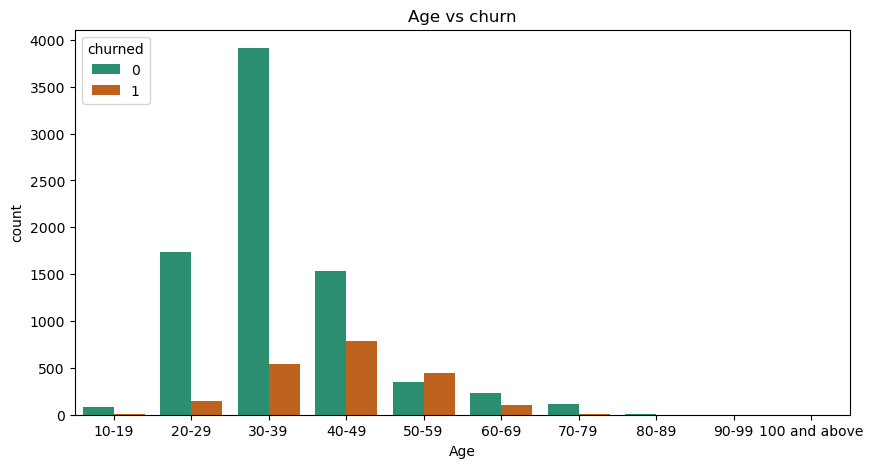

In [17]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Age',hue ='churned',data=data,palette="Dark2")
plt.title("Age vs churn")
plt.show()

In [18]:
bins = [100, 200, 300, 400, 500, 600, 700, 800, 900,1000,np.inf]
labels = ['100-199', '200-299', '300-399', '400-499', '500-599', '600-699', '700-799', '800-899', '900-999', '1000 and above']


In [19]:
data['CreditScore']=pd.to_numeric(data['CreditScore'],errors='coerce')

In [20]:
data['CreditScore']=pd.cut(data['CreditScore'],bins=bins,labels=labels)

In [21]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,600-699,France,Female,40-49,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,600-699,Spain,Female,40-49,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,500-599,France,Female,40-49,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,600-699,France,Female,30-39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,800-899,Spain,Female,40-49,2,125510.82,1,1,1,79084.10,0


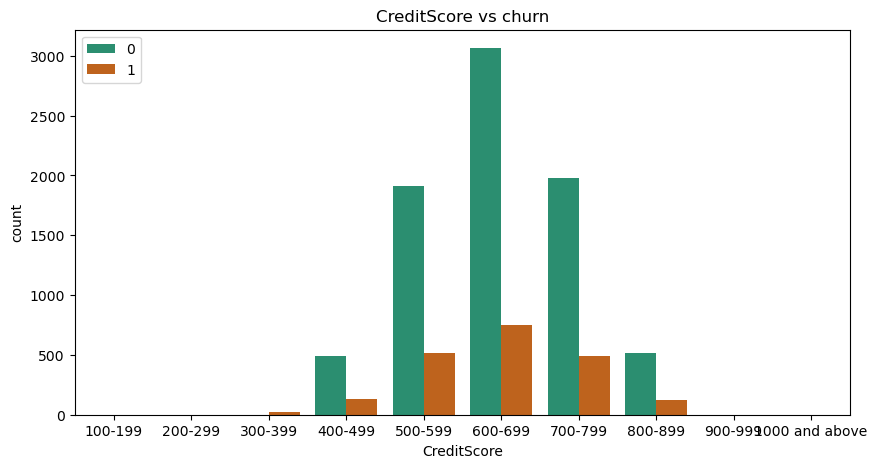

In [22]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='CreditScore',hue ='churned',data=data,palette="Dark2")
plt.title("CreditScore vs churn")
plt.legend(loc='upper left')
plt.show()

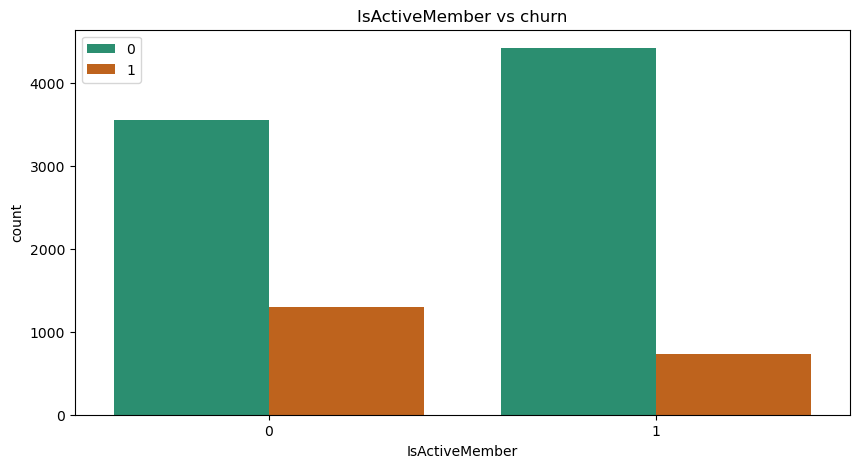

In [23]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='IsActiveMember',hue ='churned',data=data,palette="Dark2")
plt.title("IsActiveMember vs churn")
plt.legend(loc='upper left')
plt.show()

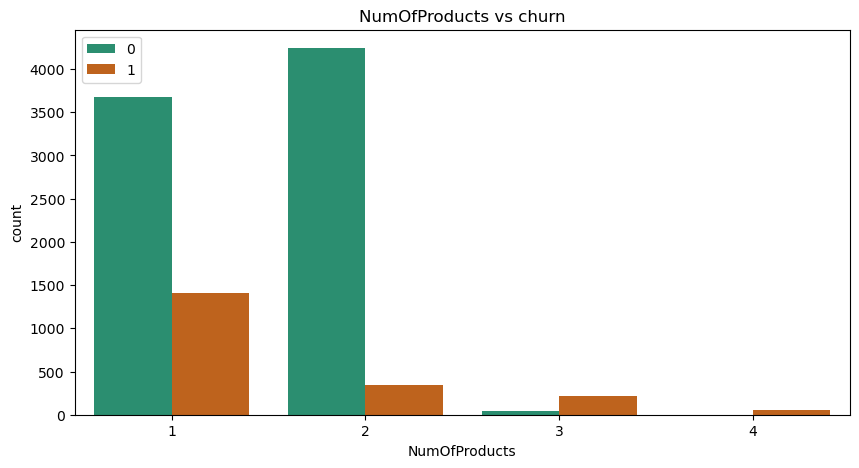

In [24]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='NumOfProducts',hue ='churned',data=data,palette="Dark2")
plt.title("NumOfProducts vs churn")
plt.legend(loc='upper left')
plt.show()

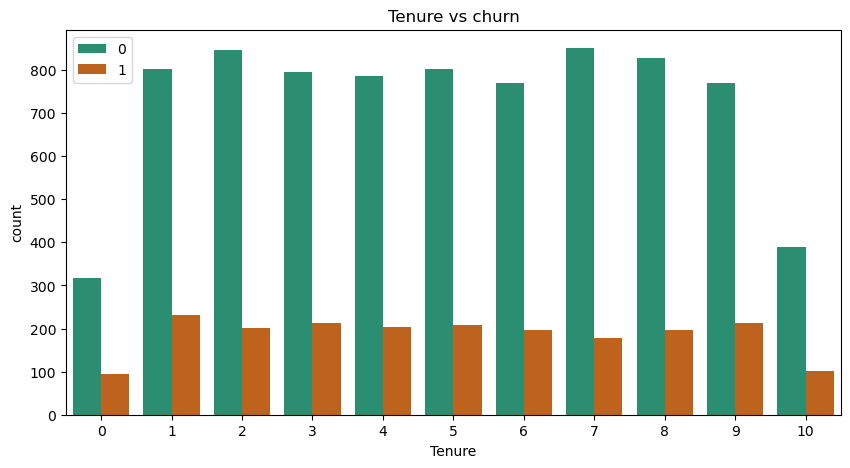

In [25]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Tenure',hue ='churned',data=data,palette="Dark2")
plt.title("Tenure vs churn")
plt.legend(loc='upper left')
plt.show()

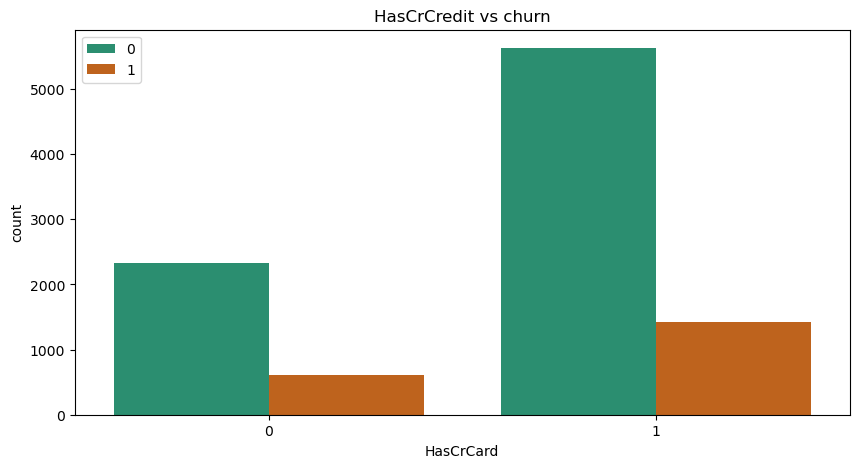

In [26]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='HasCrCard',hue ='churned',data=data,palette="Dark2")
plt.title("HasCrCredit vs churn")
plt.legend(loc='upper left')
plt.show()

# From the above analysis,
### The people of age group between 40-49 are more likely to churn
### The people having a credit score of 600-699 are more likely to churn
### The people who are not being an active member are more likely to be churn
### The people who are having numofproducts of one are more likely to churn
### The people whose tenure is one are more likely to churn
### The people who are having credit card are more likely to churn

<Figure size 2000x500 with 0 Axes>

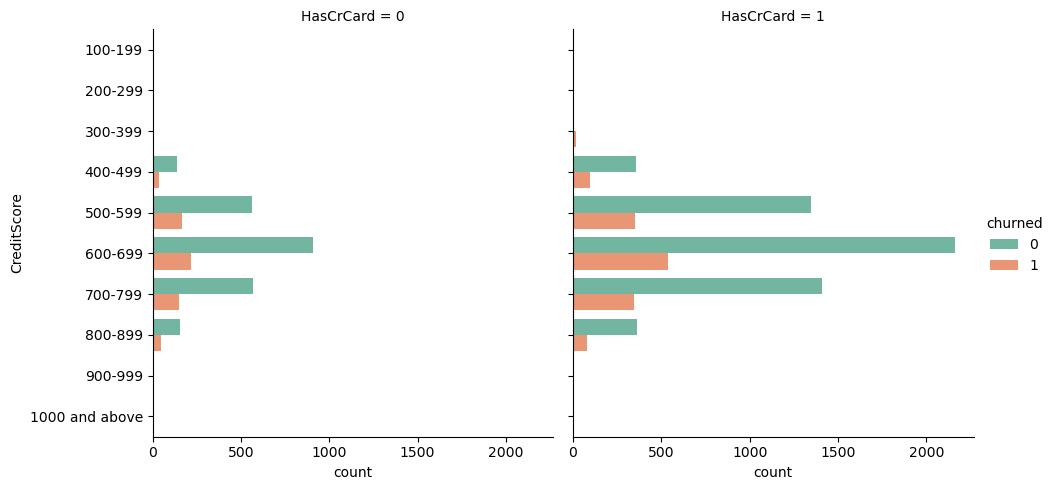

In [27]:
plt.figure(figsize=(20,5))
sns.catplot(y="CreditScore", hue="churned", kind="count",col="HasCrCard", data=data,palette="Set2")
plt.show()

<Figure size 2500x1000 with 0 Axes>

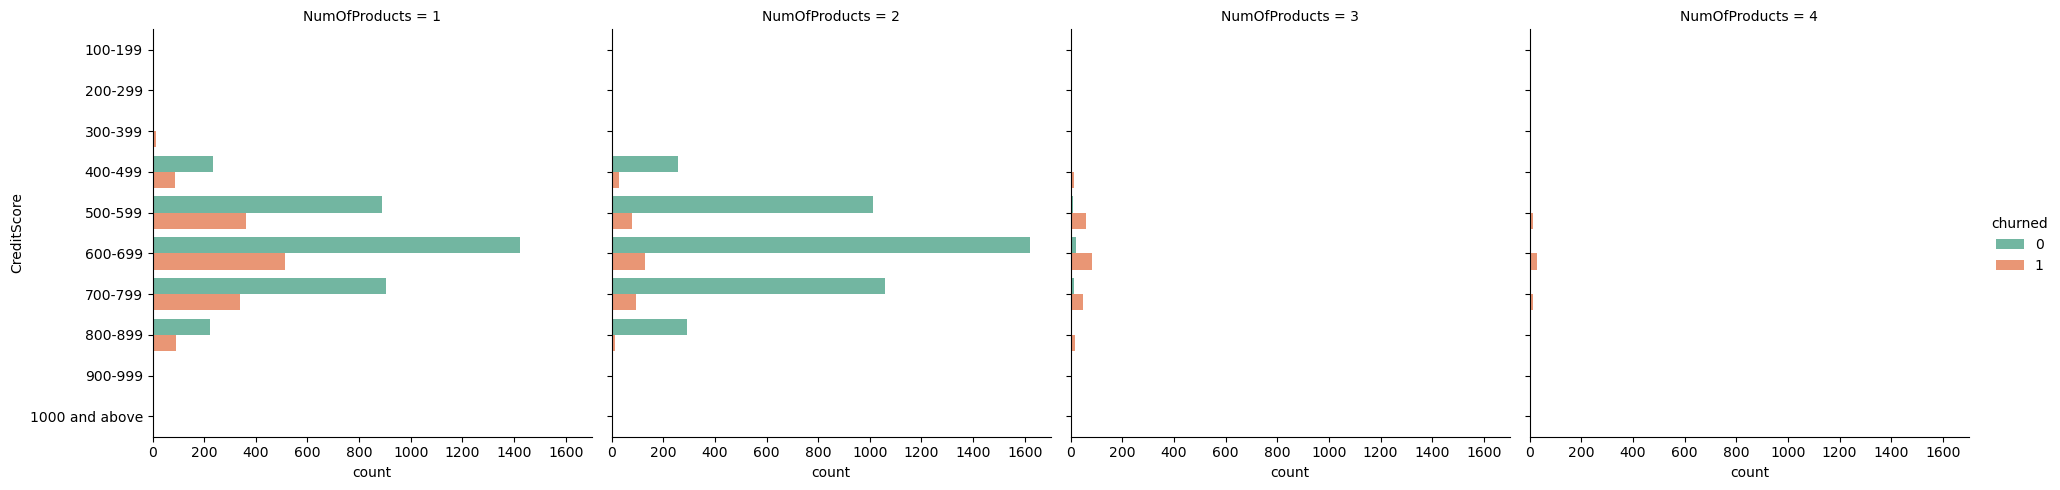

In [28]:
plt.figure(figsize=(25,10))
sns.catplot(y="CreditScore", hue="churned", kind="count",col="NumOfProducts", data=data,palette="Set2")
plt.show()

<Figure size 2500x1000 with 0 Axes>

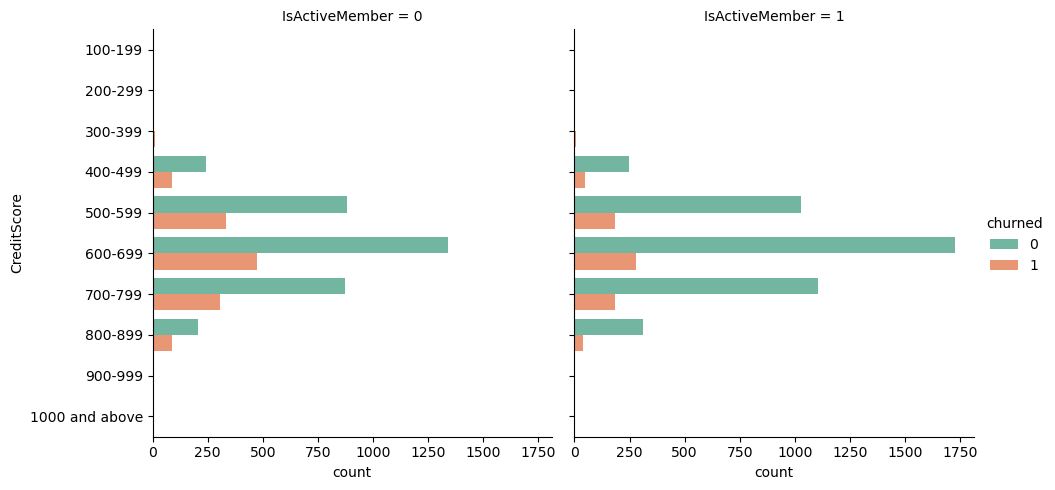

In [29]:
plt.figure(figsize=(25,10))
sns.catplot(y="CreditScore", hue="churned", kind="count",col="IsActiveMember", data=data,palette="Set2")
plt.show()

<Figure size 2500x1000 with 0 Axes>

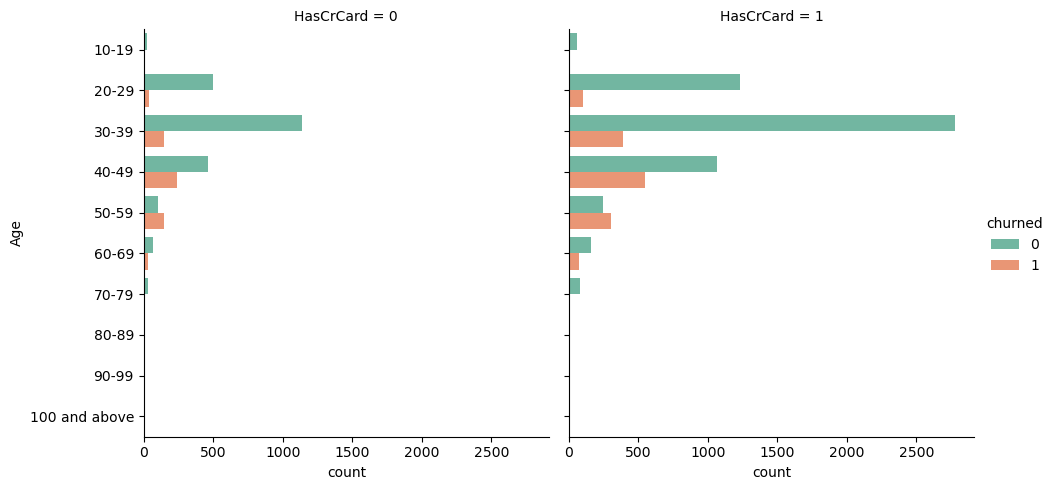

In [30]:
plt.figure(figsize=(25,10))
sns.catplot(y="Age", hue="churned", kind="count",col="HasCrCard", data=data,palette="Set2")
plt.show()

<Figure size 2500x1000 with 0 Axes>

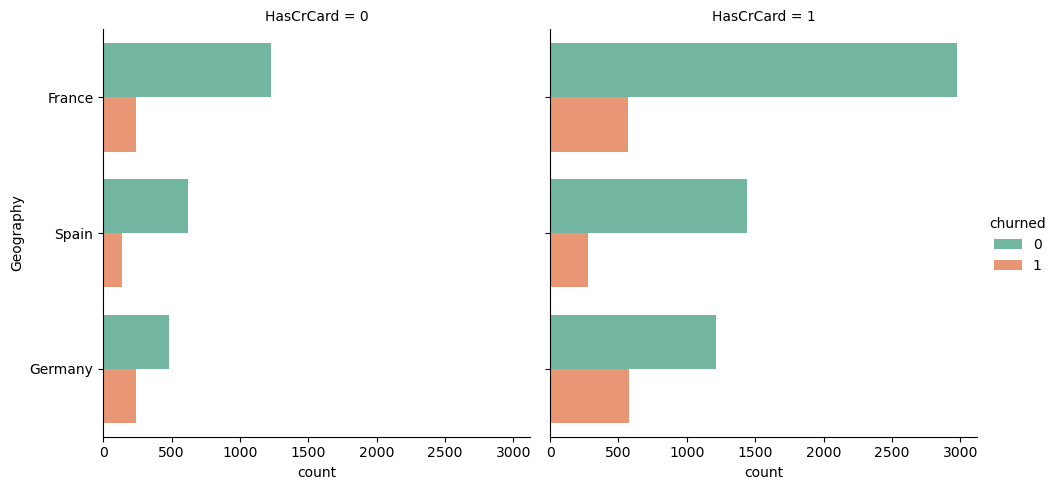

In [31]:
plt.figure(figsize=(25,10))
sns.catplot(y="Geography", hue="churned", kind="count",col="HasCrCard", data=data,palette="Set2")
plt.show()

<Figure size 2500x1000 with 0 Axes>

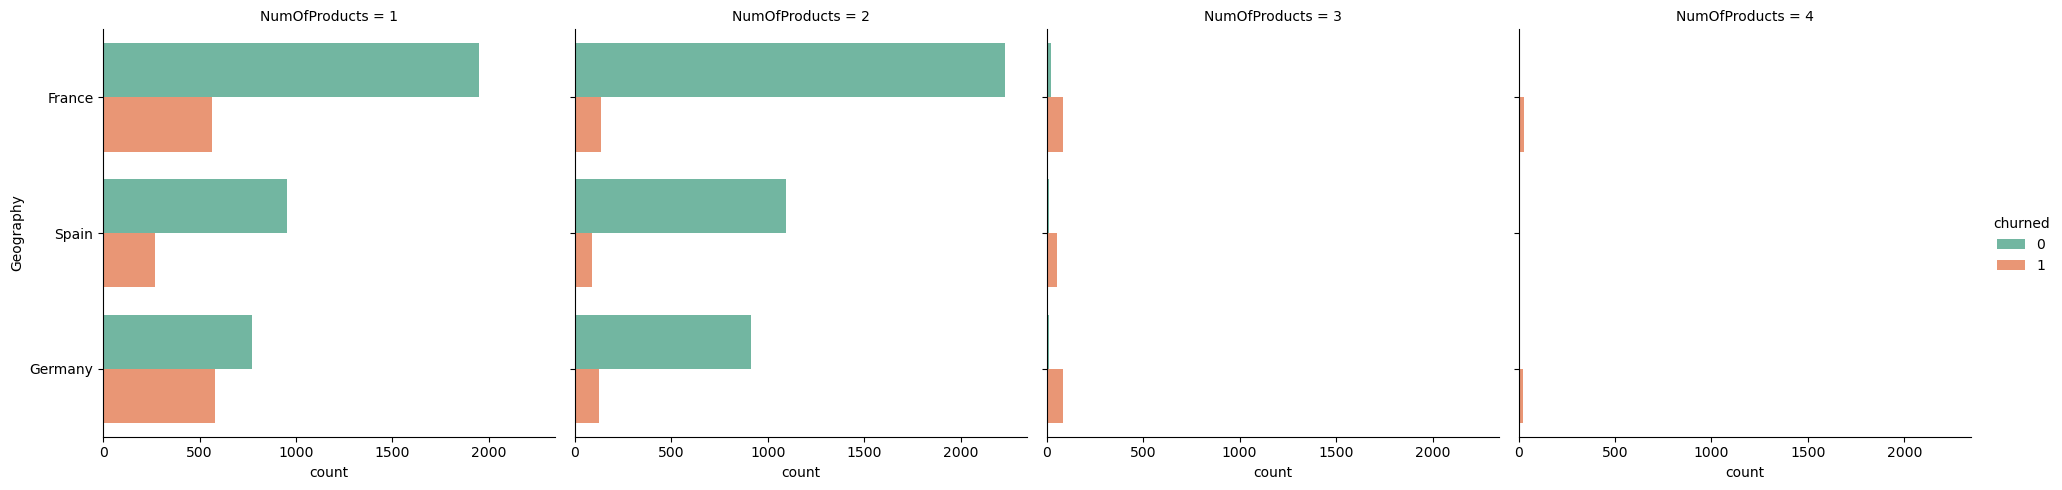

In [32]:
plt.figure(figsize=(25,10))
sns.catplot(y="Geography", hue="churned", kind="count",col="NumOfProducts", data=data,palette="Set2")
plt.show()

# From the above analysis,
### The people who are having credit score of range 600-699 and also having credit card are more likey to churn
### The people who are having credit score of range 600-699 and having noofproducts as one are more likely to churn
### The people who are having credit score of range 600-699 and are not an active member are more likely to churn
### The people of age range 40-49 and having credit card are more likely to churn
### The people who are at France and Germany and also having the credit card are more likely to churn
### The people who are at France and Germany and having noofproducts as one are more likely to churn

# 3.Product usage

# 4.Financial analysis

### a.average account of balance of all customers

In [33]:
average_balance=data['Balance'].mean()
average_balance

76485.889288

### b.financial characteristics

In [34]:
churned_data=data[data['churned']==1]
non_churned_data=data[data['churned']==0]

In [35]:
churned_data[['Balance','EstimatedSalary']].describe()

,Balance,EstimatedSalary
count,2037.000000,2037.000000
mean,91108.539337,101465.677531
std,58360.794816,57912.418071
min,0.000000,11.580000
25%,38340.020000,51907.720000
50%,109349.290000,102460.840000
75%,131433.330000,152422.910000
max,250898.090000,199808.100000


In [36]:
non_churned_data[['Balance','EstimatedSalary']].describe()

,Balance,EstimatedSalary
count,7963.000000,7963.000000
mean,72745.296779,99738.391772
std,62848.040701,57405.586966
min,0.000000,90.070000
25%,0.000000,50783.490000
50%,92072.680000,99645.040000
75%,126410.280000,148609.955000
max,221532.800000,199992.480000


In [37]:
churned_data.CreditScore.value_counts()

600-699           753
500-599           513
700-799           492
400-499           133
800-899           127
300-399            19
100-199             0
200-299             0
900-999             0
1000 and above      0
Name: CreditScore, dtype: int64

In [38]:
non_churned_data.CreditScore.value_counts()

600-699           3065
700-799           1979
500-599           1910
800-899            518
400-499            491
100-199              0
200-299              0
300-399              0
900-999              0
1000 and above       0
Name: CreditScore, dtype: int64

# 5.Predictive Modelling

In [39]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churned            0
dtype: int64

In [40]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,600-699,France,Female,40-49,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,600-699,Spain,Female,40-49,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,500-599,France,Female,40-49,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,600-699,France,Female,30-39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,800-899,Spain,Female,40-49,2,125510.82,1,1,1,79084.10,0


In [41]:
data=data.drop(columns=['RowNumber','CustomerId','Surname'])

In [42]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,600-699,France,Female,40-49,2,0.00,1,1,1,101348.88,1
1,600-699,Spain,Female,40-49,1,83807.86,1,0,1,112542.58,0
2,500-599,France,Female,40-49,8,159660.80,3,1,0,113931.57,1
3,600-699,France,Female,30-39,1,0.00,2,0,0,93826.63,0
4,800-899,Spain,Female,40-49,2,125510.82,1,1,1,79084.10,0


<Axes: >

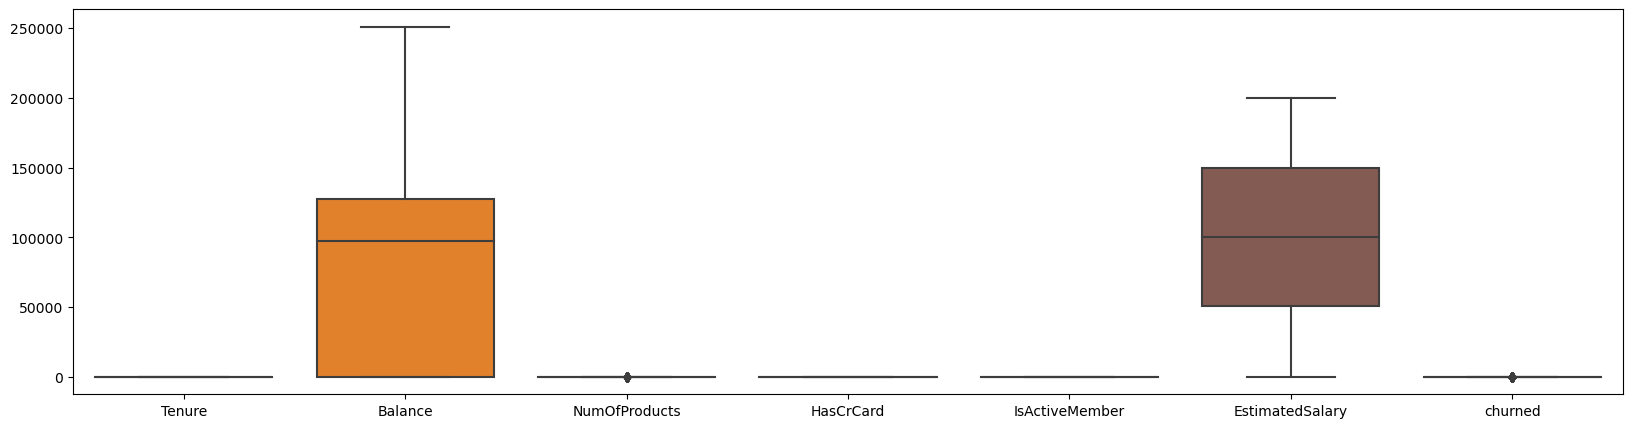

In [43]:
plt.figure(figsize=(20,5))
sns.boxplot(data)

#### label encoding

In [44]:
cols=['Geography','Gender','CreditScore','Age']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in cols:
    data[i]=le.fit_transform(data[i])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,3,0,0,3,2,0.00,1,1,1,101348.88,1
1,3,2,0,3,1,83807.86,1,0,1,112542.58,0
2,2,0,0,3,8,159660.80,3,1,0,113931.57,1
3,3,0,0,2,1,0.00,2,0,0,93826.63,0
4,5,2,0,3,2,125510.82,1,1,1,79084.10,0


In [45]:
x=data.drop("churned",axis=1)
y=data["churned"]

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print(Counter(y))

Counter({0: 7963, 1: 2037})


In [47]:
smote = SMOTE()
x_resampled, y_resampled = smote.fit_resample(x, y)


In [48]:
x_resampled.shape, y_resampled.shape

((15926, 10), (15926,))

In [49]:
print(Counter(y_resampled))

Counter({1: 7963, 0: 7963})


In [50]:
data = x_resampled
target = y_resampled

#### splitting data

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.2, random_state=42)

In [52]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12740, 10) (3186, 10) (12740,) (3186,)


### a.most significant predictors

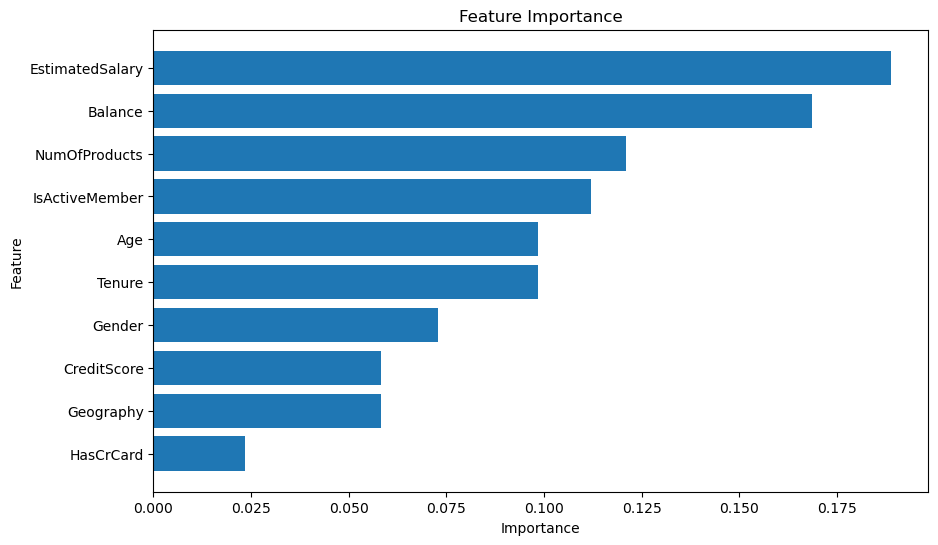

In [53]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()


Random forests are widely used because they provide a straightforward measure of feature importance based on how much the feature reduces impurity (e.g., Gini impurity or entropy) across all trees in the forest.

#### Model building

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### logistic regression

In [55]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred,y_train))
print("testing accuracy:",accuracy_score(y_test_pred,y_test))

training accuracy: 0.5660910518053375
testing accuracy: 0.578782172002511


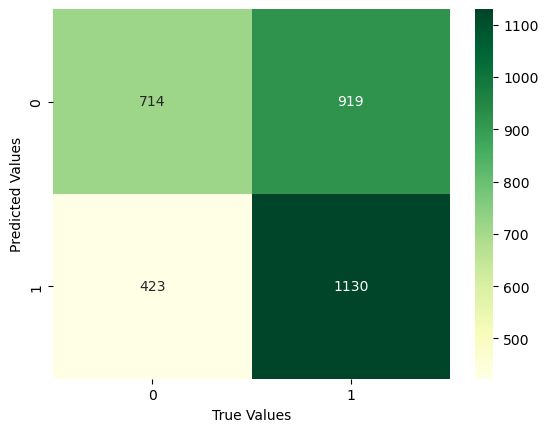

In [57]:
sns.heatmap((confusion_matrix(y_test,y_test_pred)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values');
plt.show()

In [58]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.44      0.63      0.52      1137
           1       0.73      0.55      0.63      2049

    accuracy                           0.58      3186
   macro avg       0.58      0.59      0.57      3186
weighted avg       0.62      0.58      0.59      3186



# svc

In [59]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [60]:
y_train_pred_svm=svc.predict(X_train)
y_test_pred_svm=svc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_svm,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_svm,y_test))

training accuracy: 0.5692307692307692
testing accuracy: 0.571563088512241


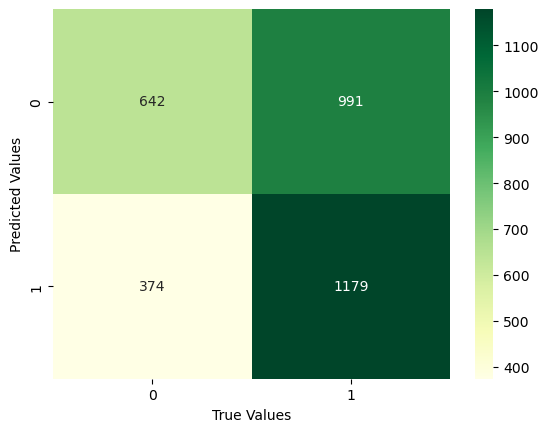

In [61]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_svm)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [62]:
print(classification_report(y_test_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.39      0.63      0.48      1016
           1       0.76      0.54      0.63      2170

    accuracy                           0.57      3186
   macro avg       0.58      0.59      0.56      3186
weighted avg       0.64      0.57      0.59      3186



# decision tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()        #default it is gini
dt1.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
y_train_pred_dt=dt1.predict(X_train)
y_test_pred_dt=dt1.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_dt,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_dt,y_test))

training accuracy: 1.0
testing accuracy: 0.8088512241054614


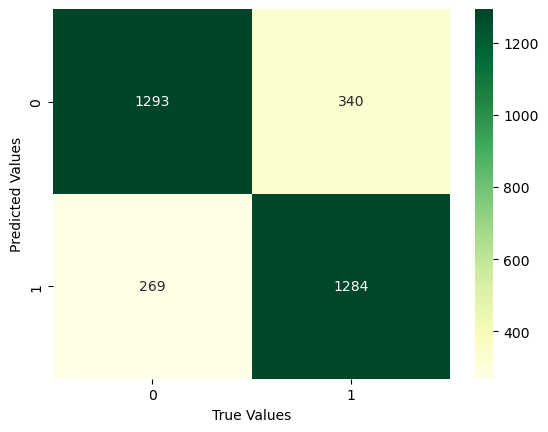

In [65]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_dt)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [66]:
print(classification_report(y_test_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1562
           1       0.83      0.79      0.81      1624

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



# kneighbour

In [67]:
from sklearn.neighbors import KNeighborsClassifier
kmn=KNeighborsClassifier()
kmn.fit(X_train,y_train)

KNeighborsClassifier()

In [68]:
y_train_pred_kmn=kmn.predict(X_train)
y_test_pred_kmn=kmn.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_kmn,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_kmn,y_test))

training accuracy: 0.78712715855573
testing accuracy: 0.6698053986189579


In [69]:
for i in range(1,15,2):
    kmn =KNeighborsClassifier(n_neighbors=i)
    kmn.fit(X_train,y_train)
    x_train_pred=kmn.predict(X_train)
    x_test_pred=kmn.predict(X_test)
    print("k:", i)
    print("training accuracy:",accuracy_score(x_train_pred,y_train))
    print("testing accuracy:",accuracy_score(x_test_pred,y_test))

k: 1
training accuracy: 1.0
testing accuracy: 0.6883239171374764
k: 3
training accuracy: 0.8343014128728414
testing accuracy: 0.6732580037664784
k: 5
training accuracy: 0.78712715855573
testing accuracy: 0.6698053986189579
k: 7
training accuracy: 0.7579277864992151
testing accuracy: 0.6578782172002511
k: 9
training accuracy: 0.7409733124018838
testing accuracy: 0.6531701192718142
k: 11
training accuracy: 0.7291208791208791
testing accuracy: 0.645323289391086
k: 13
training accuracy: 0.7153846153846154
testing accuracy: 0.6387319522912743


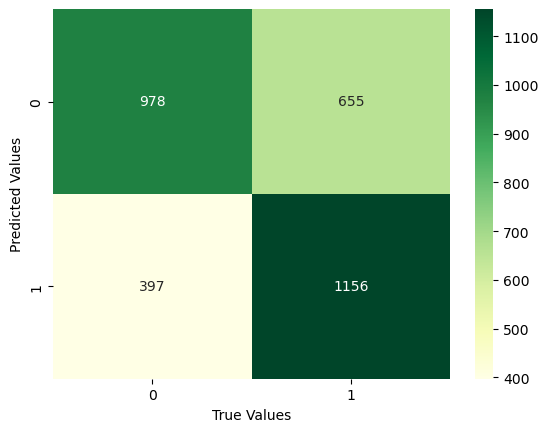

In [70]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_kmn)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [71]:
print(classification_report(y_test_pred_kmn,y_test))

              precision    recall  f1-score   support

           0       0.60      0.71      0.65      1375
           1       0.74      0.64      0.69      1811

    accuracy                           0.67      3186
   macro avg       0.67      0.67      0.67      3186
weighted avg       0.68      0.67      0.67      3186



# naive bayes

In [72]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [73]:
y_train_pred_nb=nb.predict(X_train)
y_test_pred_nb=nb.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_nb,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_nb,y_test))

training accuracy: 0.6125588697017268
testing accuracy: 0.6186440677966102


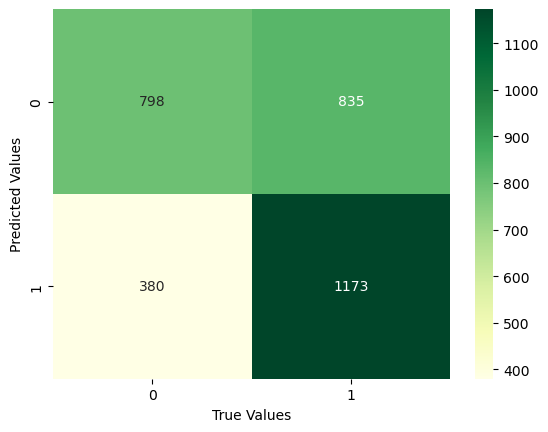

In [74]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_nb)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [75]:
print(classification_report(y_test_pred_nb,y_test))

              precision    recall  f1-score   support

           0       0.49      0.68      0.57      1178
           1       0.76      0.58      0.66      2008

    accuracy                           0.62      3186
   macro avg       0.62      0.63      0.61      3186
weighted avg       0.66      0.62      0.63      3186



# random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [77]:
y_train_pred_rfc=rfc.predict(X_train)
y_test_pred_rfc=rfc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_rfc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_rfc,y_test))


training accuracy: 0.9889324960753533
testing accuracy: 0.8408662900188324


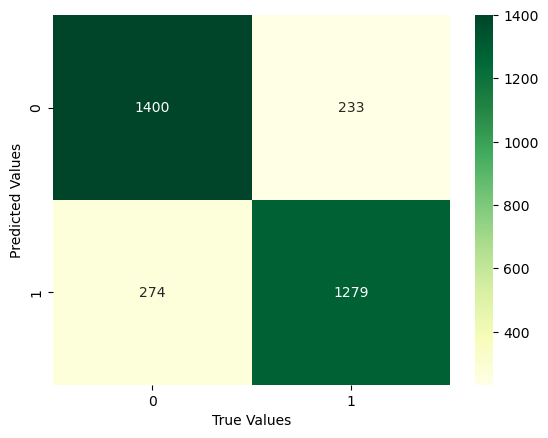

In [78]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_rfc)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [79]:
print(classification_report(y_test_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1674
           1       0.82      0.85      0.83      1512

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



# ada boost

In [80]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(X_train,y_train)

AdaBoostClassifier()

In [81]:
y_train_pred_abc=abc.predict(X_train)
y_test_pred_abc=abc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_abc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_abc,y_test))

training accuracy: 0.8131868131868132
testing accuracy: 0.8148148148148148


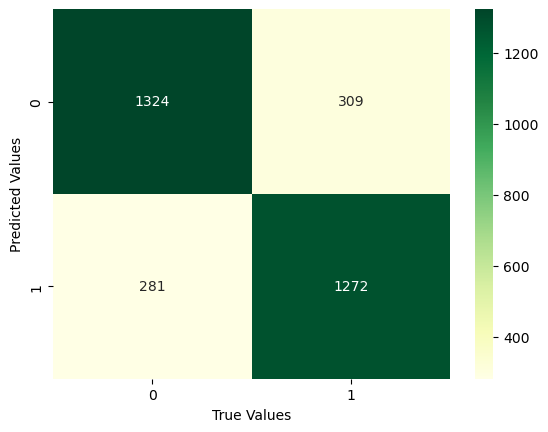

In [82]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_abc)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [83]:
print(classification_report(y_test_pred_abc,y_test))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1605
           1       0.82      0.80      0.81      1581

    accuracy                           0.81      3186
   macro avg       0.81      0.81      0.81      3186
weighted avg       0.81      0.81      0.81      3186



# gradient boost

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [85]:
y_train_pred_gbc=gbc.predict(X_train)
y_test_pred_gbc=gbc.predict(X_test)
print("training accuracy:",accuracy_score(y_train_pred_gbc,y_train))
print("testing accuracy:",accuracy_score(y_test_pred_gbc,y_test))

training accuracy: 0.8308477237048666
testing accuracy: 0.8264281230382925


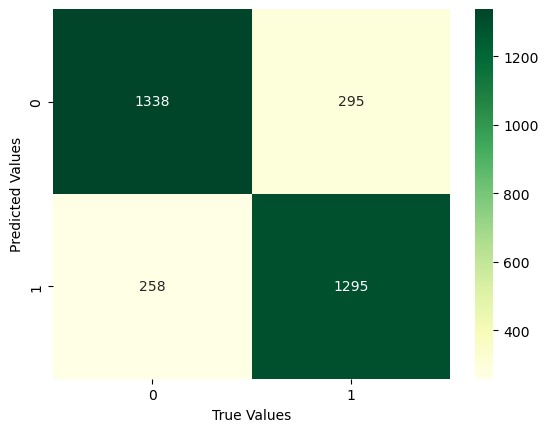

In [86]:
sns.heatmap((confusion_matrix(y_test,y_test_pred_gbc)),annot=True,fmt='.5g',cmap="YlGn");
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

In [87]:
print(classification_report(y_test_pred_gbc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1596
           1       0.83      0.81      0.82      1590

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



# hyper parameter tuning

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score


#### decision tree

In [89]:
dt_model = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)

best_params_dt = grid_search_dt.best_params_
best_dt_model = grid_search_dt.best_estimator_

y_pred_train_dt = best_dt_model.predict(X_train)
y_pred_test_dt = best_dt_model.predict(X_test)

accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f'Decision Tree:')
print(f'Best Parameters: {best_params_dt}')
print(f'Training Accuracy: {accuracy_train_dt:.2f}')
print(f'Testing Accuracy: {accuracy_test_dt:.2f}')

Decision Tree:
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 0.86
Testing Accuracy: 0.82


### ada boost

In [90]:
base_model = DecisionTreeClassifier(max_depth=1)

ada_model = AdaBoostClassifier(estimator=base_model, random_state=42)

param_grid_ada = {
    'n_estimators': np.random.randint(50, 300, size=10),  
    'learning_rate': np.random.uniform(0.01, 1.0, size=5), 
}

grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)

best_params_ada = grid_search_ada.best_params_
best_ada_model = grid_search_ada.best_estimator_

y_pred_train_ada = best_ada_model.predict(X_train)
y_pred_test_ada = best_ada_model.predict(X_test)

accuracy_train_ada = accuracy_score(y_train, y_pred_train_ada)
accuracy_test_ada = accuracy_score(y_test, y_pred_test_ada)

print(f'AdaBoost:')
print(f'Best Parameters: {best_params_ada}')
print(f'Training Accuracy: {accuracy_train_ada:.2f}')
print(f'Testing Accuracy: {accuracy_test_ada:.2f}')

AdaBoost:
Best Parameters: {'learning_rate': 0.8552287906014325, 'n_estimators': 182}
Training Accuracy: 0.82
Testing Accuracy: 0.82


### gradient boost

In [91]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

gb_model = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': np.random.randint(50, 300, size=10),  
    'learning_rate': np.random.uniform(0.01, 0.5, size=5),  
    'max_depth': [3, 4, 5, 6, None], 
    'min_samples_split': np.random.randint(2, 20, size=5), 
    'min_samples_leaf': np.random.randint(1, 10, size=5) ]
}

grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_

y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

accuracy_train_gb = accuracy_score(y_train, y_pred_train_gb)
accuracy_test_gb = accuracy_score(y_test, y_pred_test_gb)

print(f'Gradient Boosting:')
print(f'Best Parameters: {best_params_gb}')
print(f'Training Accuracy: {accuracy_train_gb:.2f}')
print(f'Testing Accuracy: {accuracy_test_gb:.2f}')


KeyboardInterrupt: 

# random forest

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': np.random.randint(50, 300, size=10),  
    'max_depth': [None] + list(np.random.randint(5, 50, size=5)), 
    'min_samples_split': np.random.randint(2, 20, size=5), 
    'min_samples_leaf': np.random.randint(1, 10, size=5) 
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f'Random Forest:')
print(f'Best Parameters: {best_params_rf}')
print(f'Training Accuracy: {accuracy_train_rf:.2f}')
print(f'Testing Accuracy: {accuracy_test_rf:.2f}')


# plotting roc

In [88]:
from sklearn.metrics import roc_curve, roc_auc_score
y_train_prob = gbc.predict_proba(X_train)[:, 1]
y_test_prob = gbc.predict_proba(X_test)[:, 1]

In [89]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

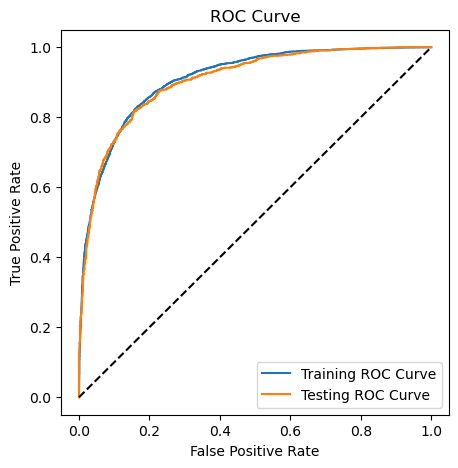

In [90]:
plt.figure(figsize=(5, 5))
plt.plot(fpr_train, tpr_train, label='Training ROC Curve')
plt.plot(fpr_test, tpr_test, label='Testing ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [91]:
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)
print("Training AUC Score:", auc_train)
print("Testing AUC Score:", auc_test)


Training AUC Score: 0.910161317353168
Testing AUC Score: 0.9053878690829712


In [92]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc

precision = precision_score(y_test, y_test_pred_gbc, average='macro')
recall = recall_score(y_test, y_test_pred_gbc, average='macro')
accuracy = accuracy_score(y_test, y_test_pred_gbc)
f1 = f1_score(y_test, y_test_pred_gbc, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

Precision: 0.8264056367333428
Recall: 0.8266104085528316
Accuracy: 0.8264281230382925
F1 Score: 0.8263964999817218
